In [1]:
%load_ext autoreload
%autoreload 2

In [47]:
from hfgtools import *

In [33]:
oa.columns

Index(['KeyApplication', 'AgencyID', 'WLNumber', 'WLName', 'Language',
       'NameFirst', 'NameMiddle', 'NameLast', 'MailAddress1', 'MailAddress2',
       'MailCity', 'MailState', 'MailZIP', 'MailZIP4', 'LegalAddress1',
       'LegalAddress2', 'LegalCity', 'LegalState', 'LegalZIP', 'LegalZIP4',
       'Phone', 'MobilePhone', 'OtherContact', 'OtherType', 'SSN', 'DOB',
       'EmancipatedMinor', 'Sex', 'Disabled', 'Race', 'Ethnicity',
       'HouseholdSize', 'HouseholdMinors', 'IncomeAnnual', 'IncomeChecking',
       'IncomeSavings', 'IncomeInvestments', 'IncomeRealEstate', 'IncomeOther',
       'AssetsChecking', 'AssetsSavings', 'AssetsInvestments',
       'AssetsRealEstate', 'AssetsOther', 'QuestionIDs', 'OptOut92006',
       'PreviousAgencyID', 'TSModified', 'TSCreated', 'ApplicationTS',
       'eAgree', 'AddressValidation', 'LotteryNumber', 'Citizenship',
       'OptOutSSN', 'AccountEmail', 'Age', 'ID', 'Address'],
      dtype='object')

In [48]:
oa_df, oa_gdf = get_oa_gdf(df=oa, export=True)

In [49]:
am_df, am_gdf = get_am_gdf(oa=oa, am=am, export=True)

In [15]:
amdf = reorganize_am(am)

In [51]:
amdf = pd.read_csv(path + '\\output\\application_members.csv')

In [6]:
amdf.shape

(49377, 39)

In [7]:
amu = amdf.drop_duplicates(subset=['ID'])

In [8]:
amu.Disabled.value_counts().rename_axis('diabled').reset_index(name='counts')

,diabled,counts
0,0,8360
1,1,3338


In [9]:
amu.shape

(11698, 39)

In [53]:
idcount = amdf.ID.value_counts().rename_axis('id').reset_index(name='counts')

In [55]:
len(idcount[idcount.counts==1].id.values)/idcount.shape[0]

0.5063680656466365

In [10]:
len(amdf.loc[amdf.ID == 'Preston-J-Decarlo-36-573991014', 'KeyApplication'].unique())

53

In [11]:
amu[amu.Age < 18].shape[0]/amu.shape[0]

0.32843221063429645

In [12]:
amu[amu.Disabled == 1].shape[0]/amu.shape[0]

0.2853479227218328

In [24]:
amu.CitizNotes.value_counts().rename_axis('citizenship').reset_index(name='counts')

,citizenship,counts
0,Eligible Citizen,11378
1,Eligible Non-Citizen,223
2,Ineligible Noncitizen,57
3,Pending Verification,31
4,No Documentation Submitted,3
5,Ineligible Child of head of household,3


In [25]:
1 - 11378/amu.shape[0]

0.02735510343648484

In [26]:
amu.RaceNotes.value_counts().rename_axis('race').reset_index(name='counts')

,race,counts
0,White,8243
1,Black/African American,1053
2,Other,753
3,American Indian/Alaska Native,337
4,"White,American Indian/Alaska Native",197
...,...,...
85,"White,Black/African American,Asian,American In...",1
86,"Black/African American,Other,White",1
87,"American Indian/Alaska Native,Native Hawaiian/...",1
88,"Native Hawaiian/Other Pacific Islander,White,B...",1


In [27]:
1 - 8243/amu.shape[0]

0.2953496324157976

In [28]:
1053/(amu.shape[0]-8243)

0.30477568740955135

In [30]:
amu.EthniNotes.value_counts().rename_axis('ethnicity').reset_index(name='counts')

,ethnicity,counts
0,Not Hispanic or Latino,9807
1,Hispanic or Latino,1891


In [31]:
amu[amu.Ethnicity == 1].shape[0]/amu.shape[0]

0.16165156436997777

In [32]:
amu.Age.value_counts().rename_axis('age').reset_index(name='counts')

,age,counts
0,1,288
1,4,272
2,2,268
3,3,256
4,8,255
...,...,...
86,88,2
87,94,2
88,93,1
89,85,1


In [21]:
oadf = reorganize_oa(oa)

In [56]:
oadf.columns

Index(['KeyApplication', 'AgencyID', 'WLNumber', 'WLName', 'Language',
       'NameFirst', 'NameMiddle', 'NameLast', 'MailAddress1', 'MailAddress2',
       'MailCity', 'MailState', 'MailZIP', 'MailZIP4', 'LegalAddress1',
       'LegalAddress2', 'LegalCity', 'LegalState', 'LegalZIP', 'LegalZIP4',
       'Phone', 'MobilePhone', 'OtherContact', 'OtherType', 'SSN', 'DOB',
       'EmancipatedMinor', 'Sex', 'Disabled', 'Race', 'Ethnicity',
       'HouseholdSize', 'HouseholdMinors', 'IncomeAnnual', 'IncomeChecking',
       'IncomeSavings', 'IncomeInvestments', 'IncomeRealEstate', 'IncomeOther',
       'AssetsChecking', 'AssetsSavings', 'AssetsInvestments',
       'AssetsRealEstate', 'AssetsOther', 'QuestionIDs', 'OptOut92006',
       'PreviousAgencyID', 'TSModified', 'TSCreated', 'ApplicationTS',
       'eAgree', 'AddressValidation', 'LotteryNumber', 'Citizenship',
       'OptOutSSN', 'AccountEmail', 'Age', 'ID', 'Address'],
      dtype='object')

<AxesSubplot:>

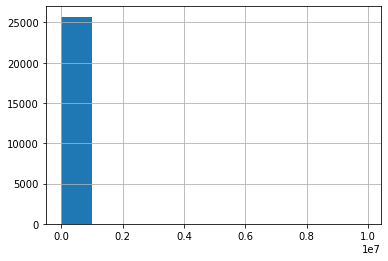

In [24]:
oadf.IncomeAnnual.hist()

In [42]:
oadf.shape

(25718, 59)

In [6]:
amdf.columns

Index(['KeyMember', 'KeyApplication', 'NameLast', 'NameMiddle', 'NameFirst',
       'SSN', 'DOB', 'Sex', 'Disabled', 'Relationship', 'Citizenship', 'Race',
       'Ethnicity', 'Age', 'ID', 'RaceNotes', 'MultiRace', 'White', 'African',
       'IndianAlsk', 'Asian', 'HawaiianOr', 'RaceOther', 'CitizNotes',
       'EthniNotes'],
      dtype='object')

In [21]:
statecnt = oadf.LegalState.value_counts().rename_axis('STUSPS').reset_index(name='counts')

In [15]:
statecnt.head()

,state,counts
0,OR,10650
1,CA,330
2,WA,112
3,IL,89
4,TX,47


In [22]:
statecnt.counts.sum()

25718

In [23]:
statecnt.to_csv(path+'\\output\\state_count.csv', index=False)

In [54]:
len(oadf.KeyApplication.unique()) == len(amdf.KeyApplication.unique())

True

In [55]:
oadf.loc[oadf.KeyApplication.isin(amdf.loc[amdf.ID == 'Preston-J-Decarlo-36-573991014', 'KeyApplication'].unique()), 'ID'].unique()

array(['Dayna-E-Mitchell-64-573110017', 'Preston-J-Decarlo-36-573991014'],
      dtype=object)

In [51]:
len(oadf.loc[oadf.ID == 'Preston-J-Decarlo-36-573991014', 'KeyApplication'].unique())

26

In [43]:
idcnt = oadf.ID.value_counts().rename_axis('id').reset_index(name='counts')

In [35]:
idcnt.to_csv(path + '\\output\\id_count.csv', index=False)

In [44]:
idcnt[idcnt.id=='Preston-J-Decarlo-36-573991014']

,id,counts
35,Preston-J-Decarlo-36-573991014,26


In [45]:
adrcnt = oadf.Address.value_counts().rename_axis('address').reset_index(name='counts')

In [47]:
adrcnt.head()

,address,counts
0,"410 Garfield , Eugene, OR 97402",327
1,"341 E 12Th Ave 573-99-1014, Eugene, OR 97401",317
2,"687 Cheshire Ave , Eugene, OR 97402",221
3,"1542 W 1St Ave , Eugene, OR 97402",208
4,"717 Highway 99 N. T-9, B-4, Eugene, OR 97402",190


In [41]:
for x in idcnt.id.values:
    if '573991014' in x:
        print(idcnt[idcnt.id == x])

                                id  counts
35  Preston-J-Decarlo-36-573991014      26


In [37]:
idcnt.counts.unique()

array([45, 39, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20,
       19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1], dtype=int64)

In [62]:
idcnt[idcnt.counts>1].shape[0]/idcnt.shape[0]

0.5101477512583211

In [27]:
legalAdr = pd.read_csv(path + '\\output\\legal_address.csv')

In [47]:
mailAdr = pd.read_csv(path + '\\output\\mail_address.csv')

In [46]:
legalAdr.head()

,KeyApplication,LegalAddress1,LegalAddress2,LegalCity,LegalState,LegalZIP,Address
0,5419013,1071 FAIRFIELD AVE,APT 100,EUGENE,OR,97402,"1071 Fairfield Ave Apt 100, Eugene, OR 97402"
1,5419021,4060 W AMAZON DR,# 180,EUGENE,OR,97405,"4060 W Amazon Dr # 180, Eugene, OR 97405"
2,5419022,15360 SE STARK ST,NaN,PORTLAND,OR,97233,"15360 Se Stark St , Portland, OR 97233"
3,5419024,2390 OAK ST APT 4,NaN,FLORENCE,OR,97439,"2390 Oak St Apt 4 , Florence, OR 97439"
4,5419040,1071 FAIRFIELD AVE,APT 100,EUGENE,OR,97402,"1071 Fairfield Ave Apt 100, Eugene, OR 97402"


In [48]:
mailAdr.head()

,KeyApplication,MailAddress1,MailAddress2,MailCity,MailState,MailZIP,Address
0,5421430,3340 ALDER ST,NaN,EUGENE,OR,97405.0,"3340 Alder St , Eugene, OR 97405"
1,5421816,3340 ALDER ST,NaN,EUGENE,OR,97405.0,"3340 Alder St , Eugene, OR 97405"
2,5423643,3944 JASPER RD,NaN,SPRINGFIELD,OR,97478.0,"3944 Jasper Rd , Springfield, OR 97478"
3,5423801,3944 JASPER RD,NaN,SPRINGFIELD,OR,97478.0,"3944 Jasper Rd , Springfield, OR 97478"
4,5431570,3302 SE 122ND AVE,APT 2,PORTLAND,OR,97236.0,"3302 Se 122Nd Ave Apt 2, Portland, OR 97236"


In [30]:
legalAdr.loc[legalAdr.KeyApplication.isin(oa.loc[oa.ID==idcnt.loc[0,:].values[0], 'KeyApplication'].values), 'Address'].unique()

array(['2574 Sorrel Way , Eugene, OR 97401'], dtype=object)

In [26]:
oa.loc[oa.ID==idcnt.loc[0,:].values[0], 'KeyApplication'].values

45

In [34]:
len(legalAdr.KeyApplication.unique())

24700

In [31]:
4347+32

4379

In [22]:
(4347+32)/6159

0.7109920441630134

In [61]:
24700/(len(oa.KeyApplication.unique()))

0.9604168286803018

In [57]:
a_w_adr = list(legalAdr.loc[legalAdr.Address.isin(loc.Address.values), 'KeyApplication'].unique()) + list(mailAdr.loc[mailAdr.Address.isin(loc.Address.values), 'KeyApplication'].unique())

In [60]:
len(a_w_adr)/(len(oa.KeyApplication.unique()))

0.9616610933976203

In [65]:
len(aqh.loc[aqh.Preference=='P7', 'KeyApplication'].unique())

25718

In [66]:
oa.loc[oa.KeyApplication.isin(mailAdr.loc[mailAdr.Address == '3340 Alder St , Eugene, OR 97405', 'KeyApplication'].values), 'ID'].unique()

array(['Makayla-K-Elliott-24-611064570'], dtype=object)

In [123]:
adr2check=legalAdr.loc[legalAdr.KeyApplication.isin(am.loc[am.ID=='Preston-J-Decarlo-36-573991014', 'KeyApplication'].values), 'Address'].unique()

In [126]:
adr2check

array(['341 E 12Th Ave , Eugene, OR 97401',
       '341 E 12Th Ave 573-99-1014, Eugene, OR 97401'], dtype=object)

In [125]:
loc.loc[loc.Address.isin(adr2check), 'Location']

47            341 E 12th Ave, Eugene, OR 97401, USA
1134    341 E 12th Ave #1014, Eugene, OR 97401, USA
Name: Location, dtype: object

In [127]:
ID2check = []

In [130]:
ID2check[1]

'Ashley-D-Sullivan-36-556954053'

In [196]:
for ID in amu.ID.values:
    adr2check=legalAdr.loc[legalAdr.KeyApplication.isin(am.loc[am.ID==ID, 'KeyApplication'].values), 'Address'].unique()
    if len(adr2check) > 2:
        #ID2check.append(ID)
        ggadr = list(loc.loc[loc.Address.isin(adr2check), 'Location'].values)
        #if ggadr[0] == ggadr[1]:
        print(f"address to check is {list(adr2check)} and google found {ggadr}")
        print("\n")

address to check is ['311 Sweet Lane , Cottage Grove, OR 97424', '2515 Frontier Dr Apt, Eugene, OR 97401', '2515 Frontier Dr Apt 17, Eugene, OR 97401'] and google found ['311 Sweet Ln, Cottage Grove, OR 97424, USA', '2515 Frontier Dr #17, Eugene, OR 97401, USA', '2515 Frontier Dr, Eugene, OR 97401, USA']


address to check is ['311 Sweet Lane , Cottage Grove, OR 97424', '2515 Frontier Dr Apt 17, Eugene, OR 97401', '2515 Frontier Dr Apt, Eugene, OR 97401'] and google found ['311 Sweet Ln, Cottage Grove, OR 97424, USA', '2515 Frontier Dr #17, Eugene, OR 97401, USA', '2515 Frontier Dr, Eugene, OR 97401, USA']


address to check is ['311 Sweet Lane , Cottage Grove, OR 97424', '2515 Frontier Dr Apt 17, Eugene, OR 97401', '2515 Frontier Dr Apt, Eugene, OR 97401'] and google found ['311 Sweet Ln, Cottage Grove, OR 97424, USA', '2515 Frontier Dr #17, Eugene, OR 97401, USA', '2515 Frontier Dr, Eugene, OR 97401, USA']


address to check is ['448 W. 12Th 3, Eugene, OR 97408', '448 W. 12Th 3, Euge

In [129]:
len(ID2check)

127

In [133]:
list(loc.loc[loc.Address.isin(['1880 Cleveland St Apt 1, Eugene, OR 97405']), 'Location'].values)

['1880 Cleveland St APT 1, Eugene, OR 97405, USA']

In [ ]:
['4175 Wagner St 432, Eugene, OR 97402', '4175 Wagoner St Apt G432, Eugene, OR 97402']

In [68]:
homeless=aqh.loc[(aqh.Preference=='P7') & (aqh.Answer=='Yes'), 'KeyApplication'].values

In [70]:
len(aqh.loc[(aqh.Preference=='P5') & (aqh.Answer=='Yes') & (aqh.KeyApplication.isin(homeless)), 'KeyApplication'].unique())

746